<a href="https://colab.research.google.com/github/SarahZhou2018/COMP551/blob/master/mini_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

num_train, num_test = x_train.shape[0], x_test.shape[0]
x_train = x_train.reshape(num_train, -1)    # vectorization
x_test = x_test.reshape(num_test, -1)

# from sklearn.preprocessing import StandardScaler        
# scaler = StandardScaler()
# norm = np.linalg.norm(x_train)
x_train = (x_train + 1) / 255  # normalization to the range [0, 1] 
x_test = (x_test + 1) / 255

11493376/11490434 [==============================] - 0s 0us/step


## Test out normalization following the guide:

In [3]:
# import tensorflow as tf
# import numpy as np

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# num_train, num_test = x_train.shape[0], x_test.shape[0]
# x_train = x_train.reshape(num_train, -1)    # vectorization
# x_test = x_test.reshape(num_test, -1)
# # display(x_train)
# # display(x_test)

# # Normalize following guide
# # Assume input data matrix X of size [N x D]
# mean = np.mean(x_train, axis = 0) # zero-center the data (important)
# mean2 = np.mean(x_test, axis = 0) # zero-center the data (important)

# X = x_train - mean

# # cov = np.dot(X.T, X) / X.shape[0] # get the data covariance matrix
# x_train.shape
# # x_train_n = 

# # x_test_n =


In [4]:
# L2 
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = cross_entropy_loss(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2 * m)
    ### END CODER HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

## Activation Functions

In [5]:
def relu():
    return Relu()


def sigmoid():
    return Sigmoid()


def tanh():
    return Tanh()


def softmax(x):     # softmax
    nx = x - np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(nx)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def cross_entropy_loss(y_pred, y_true):     # cross entropy as the loss function
    batch = y_true.shape[0]
    return -np.sum(np.log(y_pred[:, y_true] + 1e-7)) / batch


In [6]:
class Relu:     # relu activation function

    def forward(self, x):
        self.x = x
        self.mask = x <= 0

        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, d): #take derevative for the backward process
        d[self.mask] = 0
        return d


In [7]:
class Sigmoid:      # sigmoid activation function


    def forward(self, x):
        self.x = x
        self.y = 1.0/(1 + np.exp(-x))
        return self.y

    def backward(self, d): #take derevative for the backward process
        return d * (1.0 - self.y) * self.y


class Tanh:     # tanh activation function

    def forward(self, x):
        self.x = x
        return np.tanh(x)

    def backward(self, d): #take derevative for the backward process
        return d * (1-np.tanh(self.x) ** 2)


In [8]:
class Affine:       # model x*w + b & error backprop

    def __init__(self, w, b):
        self.w = w
        self.b = b

    def forward(self, x):
        self.x = x
        self.y = np.dot(x, self.w) + self.b
        return self.y

    def backward(self, d):
        dx = np.dot(d, self.w.T)
        self.dw = np.dot(self.x.T, d)
        self.db = np.sum(d, axis=0)
        return dx


class SoftmaxLoss:

    def __init__(self):
        pass

    def forward(self, x, y_true):
        self.y_true = y_true
        self.y_pred = softmax(x)
        self.loss = cross_entropy_loss(self.y_pred, self.y_true)
        return self.loss

    def backward(self):
        class_num = self.y_pred.shape[1]
        batch = self.y_true.shape[0]
        y_true_one_hot = np.zeros((batch, class_num))
        y_true_one_hot[np.arange(batch), self.y_true] = 1
        return (self.y_pred - y_true_one_hot) / batch


## MLP

In [9]:
class MLP:

    def __init__(self, input_layer=784, hidden_layer= [], output_layer=10, max_episode=50000,
                 active_func=relu, batch_size=200, learing_rate=0.1): # intotal 784 pixel inputs, 10 outputs refers to integer 0-9
        size = input_layer
        self.layers = []
        self.cal_layer = []

        for hidden in hidden_layer:
            w, b = np.random.randn(size, hidden), np.random.randn(1, hidden)        # w, b refer to "weight" and "bias"
            self.layers.append({'w': w, 'b': b})
            self.cal_layer.append(Affine(w, b))
            self.cal_layer.append(active_func())
            size = hidden

        w, b = np.random.randn(size, output_layer), np.random.randn(1, output_layer)
        self.cal_layer.append(Affine(w, b))
        self.layers.append({'w': w, 'b': b})
        self.active_func = active_func
        # self.de_active_func = active_func[1]
        self.max_episode = max_episode
        self.batch_size = batch_size
        self.lr = learing_rate

        self.out_layer = SoftmaxLoss()

    def fit(self, X, y):
        for ep in range(self.max_episode):      # number of gradient descent
            # random select some data
            batch = np.random.choice(X.shape[0], self.batch_size)       # sample a part of data each time for implementing mini-batch
            x, y_true = X[batch], y[batch]

            # forward               
            for cal in self.cal_layer:
                x = cal.forward(x)
            self.out_layer.forward(x, y_true)

            # backward              # backprop, calculate gradient each iteration
            d = self.out_layer.backward()
            for cal in reversed(self.cal_layer):
                d = cal.backward(d)

            # check grad
            grad = []
            for cal in self.cal_layer:
                if isinstance(cal, Affine):     # only Affine has parameters needed to be updated
                    grad.append({'w': cal.dw, 'b': cal.db})

            # update grad
            for i in range(len(self.layers)):       # update parameter at each iteration -> SGD
                self.layers[i]['w'] -= self.lr * grad[i]['w']
                self.layers[i]['b'] -= self.lr * grad[i]['b']

            

    def predict(self, X):
        x = X
        # for i in range(len(self.layers) - 1):
        #     w, b = self.layers[i]['w'], self.layers[i]['b']
        #     x = self.active_func(np.dot(x, w) + b)

        # w, b = self.layers[len(self.layers) - 1]['w'], self.layers[len(self.layers) - 1]['b']
        # x = np.dot(x, w) + b
        # y = np.argmax(x, axis=1)
        # return y

        for cal in self.cal_layer:
            x = cal.forward(x)
        # self.out_layer.forward(x, y_true)

        x = softmax(x)
        y = np.argmax(x, axis=1)
        return y


    def evaluate(self, y_true, y_predict):
        return sum(y_true == y_predict) / len(y_true)

## Parameter Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters = {
    #"hidden_layer": [[], [128], [128, 128]],
    "hidden_layer": [[]],
    "max_episode": [100000],
    "batch_size": [200],
    "learing_rate": [0.1, 0.01, 0.05, 0.001]
}

# Grid Search

from  copy import deepcopy
def generate_all():
    keys = list(parameters.keys())
    parameters_list = [{}]

    for key in keys:
        tmp = []
        for val in parameters[key]:
            for pre in parameters_list:
                pre = deepcopy(pre)
                pre[key] = val
                tmp.append(pre)
        parameters_list = tmp
    return parameters_list

best, best_p, best_acc = None, None, 0

for p in generate_all():
    mlp = MLP(**p)
    mlp.fit(x_train, y_train)
    acc = mlp.evaluate(y_test, mlp.predict(x_test))
    if acc > best_acc:
        best_acc = acc
        best_p = p
        best = mlp
    print("Acc ", acc, " with parameter: ", p)

print("Best acc: ", best_acc)
print("Best mlp parameters: ", best_p)

Acc  0.9042  with parameter:  {'hidden_layer': [], 'max_episode': 100000, 'batch_size': 200, 'learing_rate': 0.1}
Acc  0.8667  with parameter:  {'hidden_layer': [], 'max_episode': 100000, 'batch_size': 200, 'learing_rate': 0.01}
Acc  0.8997  with parameter:  {'hidden_layer': [], 'max_episode': 100000, 'batch_size': 200, 'learing_rate': 0.05}


KeyboardInterrupt: ignored

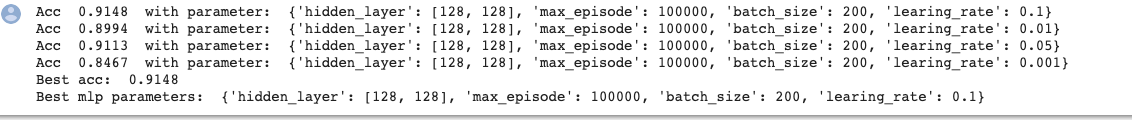

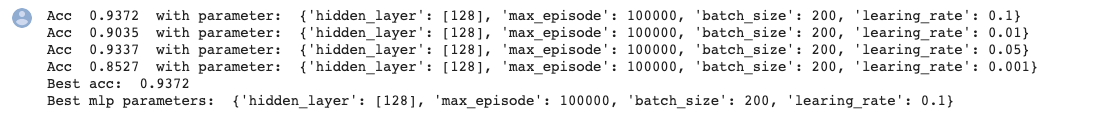

## Run Experiments

In [11]:
def test(mlp):

   # yp = mlp.predict(x_test)
    #print("before train, on test set: ", mlp.evaluate(y_test, yp))
   # print("before train, on train set: ", mlp.evaluate(y_train, mlp.predict(x_train)))
   # print("start train")

    mlp.fit(x_train, y_train)
    yp = mlp.predict(x_test)
    print("after train, on test set:", mlp.evaluate(y_test, yp))
    print("after train, on train set:", mlp.evaluate(y_train, mlp.predict(x_train)))
    print()

2 layers 100 000 max_episodes

In [ ]:
test(MLP(hidden_layer=[], max_episode=10000, learing_rate=0.01))
#
test(MLP(hidden_layer=[128], max_episode=10000, learing_rate=0.01))
#
test(MLP(hidden_layer=[128, 128], max_episode=100000, learing_rate=0.1))

after train, on test set: 0.7737
after train, on train set: 0.7678666666666667

after train, on test set: 0.8605
after train, on train set: 0.8661333333333333

after train, on test set: 0.9038
after train, on train set: 0.9331666666666667



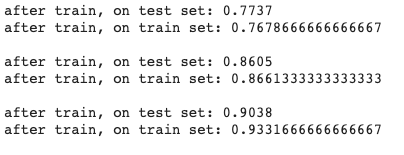

2 layers 1000 000 max_episodes

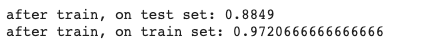

2 layers 500 000 max_episodes

In [ ]:
test(MLP(hidden_layer=[128, 128], max_episode=500000, learing_rate=0.1))

after train, on test set: 0.1136
after train, on train set: 0.11236666666666667



Sigmoid

In [ ]:
test(MLP(hidden_layer=[128, 128], max_episode=100000, learing_rate=0.1, active_func = sigmoid))

after train, on test set: 0.924
after train, on train set: 0.9841166666666666



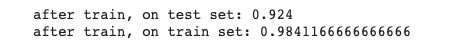

Tanh

In [ ]:
test(MLP(hidden_layer=[128, 128], max_episode=100000, learing_rate=0.1, active_func = tanh))

after train, on test set: 0.8497
after train, on train set: 0.99705



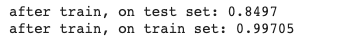

### Run on unormalized data

In [ ]:
# unormalized data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

num_train, num_test = x_train.shape[0], x_test.shape[0]
x_train = x_train.reshape(num_train, -1)    # vectorization
x_test = x_test.reshape(num_test, -1)

In [12]:
test(MLP(hidden_layer=[128, 128], max_episode=100000, learing_rate=0.1))

after train, on test set: 0.9183
after train, on train set: 0.9513



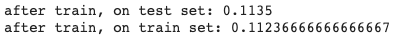

In [ ]:
test(MLP(hidden_layer=[128, 128], max_episode=100000, learing_rate=0.1, active_func = sigmoid))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


after train, on test set: 0.9397
after train, on train set: 0.9536166666666667



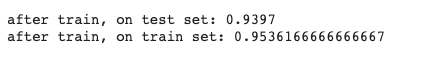

In [ ]:
test(MLP(hidden_layer=[128, 128], max_episode=100000, learing_rate=0.1, active_func = tanh))

after train, on test set: 0.89
after train, on train set: 0.8975166666666666



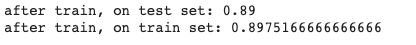

## Decision Boundary

In [ ]:
def plotDecisionBoundaries(model, x_train, y_train, f, s, tree=False): 
    #we can make the grid finer by increasing the number of samples from 200 to higher value
    x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
    x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
    #to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    
    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    #to get class probability of all the points in the 2D grid
    if tree == True:
      y_prob_all = model.fit(x_train[:, 0:2], y_train).predict(x_all)
    else:
      y_prob_all, _ = model.fit(x_train[:, 0:2], y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    # print(y_pred_all.shape, y_train_prob.shape)
    plt.scatter(x_train[:,0], x_train[:,1], c=np.argmax(y_train_prob, axis=-1), marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis=-1), marker='.', alpha=0.01)
    plt.ylabel(s)
    plt.xlabel(f)
    plt.show()

## Creativity

different regularizations -- k-fold cross validation

In [ ]:
# get k-folds train/validation set
def cross_validation_split(data, k_folds):
    x_data, y_data = data
    cv_data = []
    fold = x_data.shape[0] // k_folds  # number of folds

    for i in range(k_folds):
        x_train = np.vstack((x_data[: i*fold], x_data[(i+1)*fold: ]))  # stack left part and right part vertically
        y_train = np.hstack((y_data[: i*fold], y_data[(i+1)*fold: ]))  # stack left part and right part horizontally
        x_val = x_data[i*fold: (i+1)*fold]
        y_val = y_data[i*fold: (i+1)*fold]
        
        cv_data.append(((x_train, y_train), (x_val, y_val)))

    return cv_data
    
# evaluate accuracy
def evaluate_acc(y_pred, y_true):
    return sum(y_pred == y_true) / len(y_true)

# evaluate average accuracy of k-fold cross validation set
def kfoldCV(cv_data, model):
    result = 0
    for train, val in cv_data:        
        x_train, y_train = train
        x_val, y_val = val
        model.fit(x_train, y_train)
        y_hat = model.predict(x_val)
        result += evaluate_acc(y_hat, y_val)
        # print('===================== finish processing one CV set =====================')
    return result / len(cv_data)


Convolutional Neural Networks

pre-built CNNs -- LeNet

In [ ]:
from __future__ import print_function

%matplotlib inline
import scipy.misc # to visualize only  
import matplotlib.pyplot as plt
import string

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

import sys
import numpy as np
import cv2
import sklearn.metrics as sklm

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model
from keras.datasets import mnist

from keras import backend as K

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.reshape(-1, 64, 64)
y_train.reshape(-1, 1) 

print(x_train.shape)
print(y_train.shape)

ValueError: ignored

In [ ]:
#K.image_data_format() == "channels_first" 
img_dim_ordering = 'tf'
K.set_image_dim_ordering(img_dim_ordering)

#????
train_images = pd.read_pickle('./train_images.pkl')
train_labels = pd.read_csv('./train_labels.csv')
test_images = pd.read_pickle('./test_images.pkl')

# Preprocessing
x = train_images
y = train_labels['Category'].values
x = x.reshape(-1, 64, 64)
y = y.reshape(-1, 1) 
x = np.uint8(x)
y = np.uint8(y)


for i in range(x.shape[0]):
    ret,thresh = cv2.threshold(x[i],254,255,cv2.THRESH_BINARY)
    x[i] = thresh

AttributeError: ignored

In [ ]:
num_classes = 10
img_dim = 64

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

x_train = x_train.reshape(x_train.shape[0], img_dim, img_dim, 1)
x_val = x_val.reshape(x_val.shape[0], img_dim, img_dim, 1)
input_shape = (img_dim, img_dim, 1)


x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255


y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

NameError: ignored

In [ ]:
num_classes = 10
batch_size = 32
epochs = 10

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 20:
        lr *= 1e-3
    elif epoch > 15:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),cooldown=0,patience=4,min_lr=0.5e-9)
callbacks = [lr_reducer, lr_scheduler]

history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, callbacks=callbacks, validation_data = (x_val,y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: ignored